In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ipywidgets
import traitlets
import matplotlib.colors as colors

In [18]:
pay = pd.read_csv('https://raw.githubusercontent.com/dbrinzo2/dbrinzo2.github.io/main/State%20Employee%20Pay.csv',
            na_values={'Period Pay Rate': 0,
                         'YTD Gross':0})
pay

,_id,Id,Agency,Agency Division,Employee Name,Position Title,Period Pay Rate,YTD Gross
0,1,F457B2D146084D21A284F32A6AFEBFB89B705798,ABE LINCOLN PRES LIBRARY & MUS,ALPLM CONTRACTUAL EMPLOYEES,WILLIAM GREEN,CONTRACTUAL WORKER,3000.0,40200.0
1,2,D2CCEC9FF087EAD9C3C57E2F7A4E988A45A12E22,ABE LINCOLN PRES LIBRARY & MUS,ALPLM FTE EMPLOYEES,DARIAN FERNANDES,ACCOUNT TECHNICIAN II,1900.0,43700.0
2,3,3B46B264A6044D821EDF862475BB114DDF857EC2,ABE LINCOLN PRES LIBRARY & MUS,ALPLM FTE EMPLOYEES,BLAIR JONES,BUILDING/GROUNDS LABORER,1900.0,39900.0
3,4,7CFB385847158994B7B94493163948FB870A2803,ABE LINCOLN PRES LIBRARY & MUS,ALPLM FTE EMPLOYEES,BRIAN DANAHA,BUILDING/GROUNDS LABORER,1900.0,38700.0
4,5,0A8984B8AAB8C42C541E627CD8373DE8DC41467F,ABE LINCOLN PRES LIBRARY & MUS,ALPLM FTE EMPLOYEES,HAROLD STURM,BUILDING/GROUNDS LABORER,2000.0,39600.0
...,...,...,...,...,...,...,...,...
58554,58555,A185CAA9F410A744A0E2651EFCE25376782A9925,VETERANS' AFFAIRS,VETERANS SERVICE OFFICE,TINA PAGGI,VETERANS SERVICE OFFICER,2900.0,59000.0
58555,58556,1BFE5B3F2BC8D0F9DABE0837B0FC186DD92ABF88,VETERANS' AFFAIRS,VETERANS SERVICE OFFICE,TRACY TRUEBLOOD,VETERANS SERVICE OFFICER,2600.0,52600.0
58556,58557,9AE8EDC0BEACE700ED006EB789B1AEB93653E3A9,VETERANS' AFFAIRS,VETERANS SERVICE OFFICE,WALTER WILSON,VETERANS SERVICE OFFICER,2900.0,59400.0
58557,58558,3143C6D3D894D1A10F747528D8EB38AB40F91845,VETERANS' AFFAIRS,VETERANS SERVICE OFFICE,WILLIAM ILLA,VETERANS SERVICE OFFICER,2300.0,47600.0


#Another draft of work, this performs a scatter plot with a color map, I was trying to make a bar graph, but this was working more successfully

column_types = ['Agency', 'Agency Division', 'Employee Name']
column_pay = ['Period Pay Rate', 'YTD Gross']

@ipywidgets.interact(xaxis=column_types, 
                     yaxis=column_pay, 
                     colormap = plt.colormaps(),
                     color_range = (1.0, 352.0, 1.0),
                     sym_log=True)

def create_scatter(xaxis, yaxis, colormap = 'terrain', color_range = 352, sym_log = True):
    with plt.style.context("ggplot"):
        fig = plt.figure(figsize = (24,8))
        
        if sym_log:
            norm = colors.SymLogNorm(10)
        else:
            norm = colors.Normalize()
        
        plt.scatter(x = pay[xaxis],
                    y = pay[yaxis],
                    c=np.log10(pay['YTD Gross']),
                    norm = norm,
                    cmap = colormap,
                    s = 20
                   )

        plt.clim(-color_range, color_range)
        plt.colorbar(extend = 'both')
        plt.xlabel(xaxis.capitalize())
        plt.ylabel(yaxis.capitalize())
        plt.xticks(rotation = 90)
        plt.title("Interactable Pay Graph")

#Something I was working on here

column_types = ['Agency', 'Agency Division']
column_pay = ['Period Pay Rate', 'YTD Gross']

@ipywidgets.interact(xaxis=column_types, 
                     yaxis=column_pay)

def create_bar(xaxis, yaxis):
    with plt.style.context("ggplot"):
        fig = plt.figure(figsize = (48,12))
        
        plt.bar(x = pay[xaxis],
                    height = pay[yaxis]
                   )

        plt.xlabel(xaxis.capitalize())
        plt.ylabel(yaxis.capitalize())
        plt.xticks(rotation = 90)
        plt.title("Interactable Pay Graph")

column_types = ['Agency', 'Agency Division', 'Employee Name']
column_pay = ['Period Pay Rate', 'YTD Gross']
@ipywidgets.interact(xaxis=column_types, 
                     yaxis=column_pay)

def create_scatter(xaxis, yaxis):
    with plt.style.context("ggplot"):
        fig, ax = plt.subplots(1, 1, figsize = (16,8))
        
        x = pay[xaxis]
        y = pay[yaxis]
        ax.bar(x, y.mean())

        plt.xlabel(xaxis.capitalize())
        plt.ylabel(yaxis.capitalize())
        plt.xticks(rotation = 90)
        plt.title("Interactable Pay Graph", fontsize = 24, weight = "bold")

interactive(children=(Dropdown(description='xaxis', options=('Agency', 'Agency Division', 'Employee Name'), va…

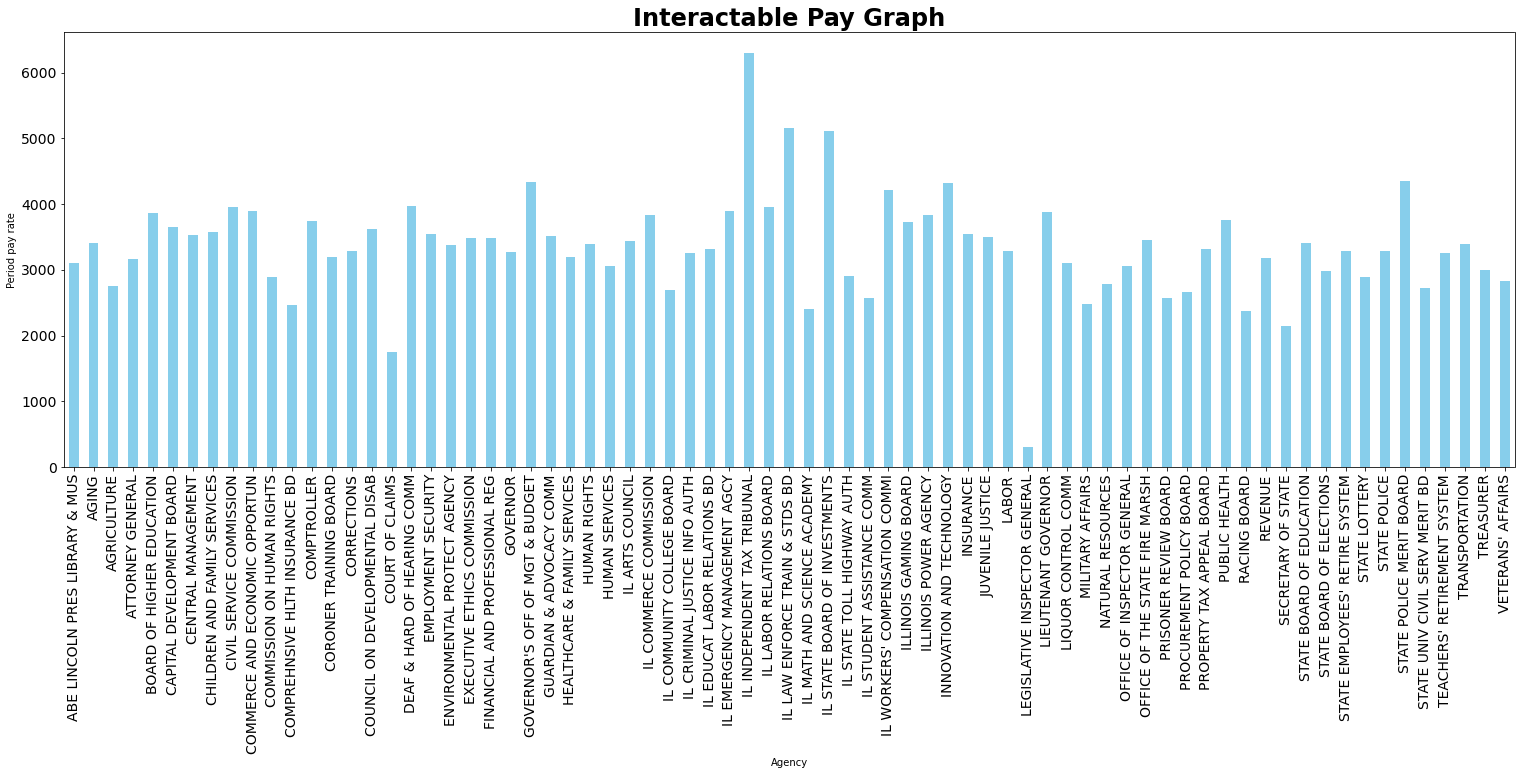

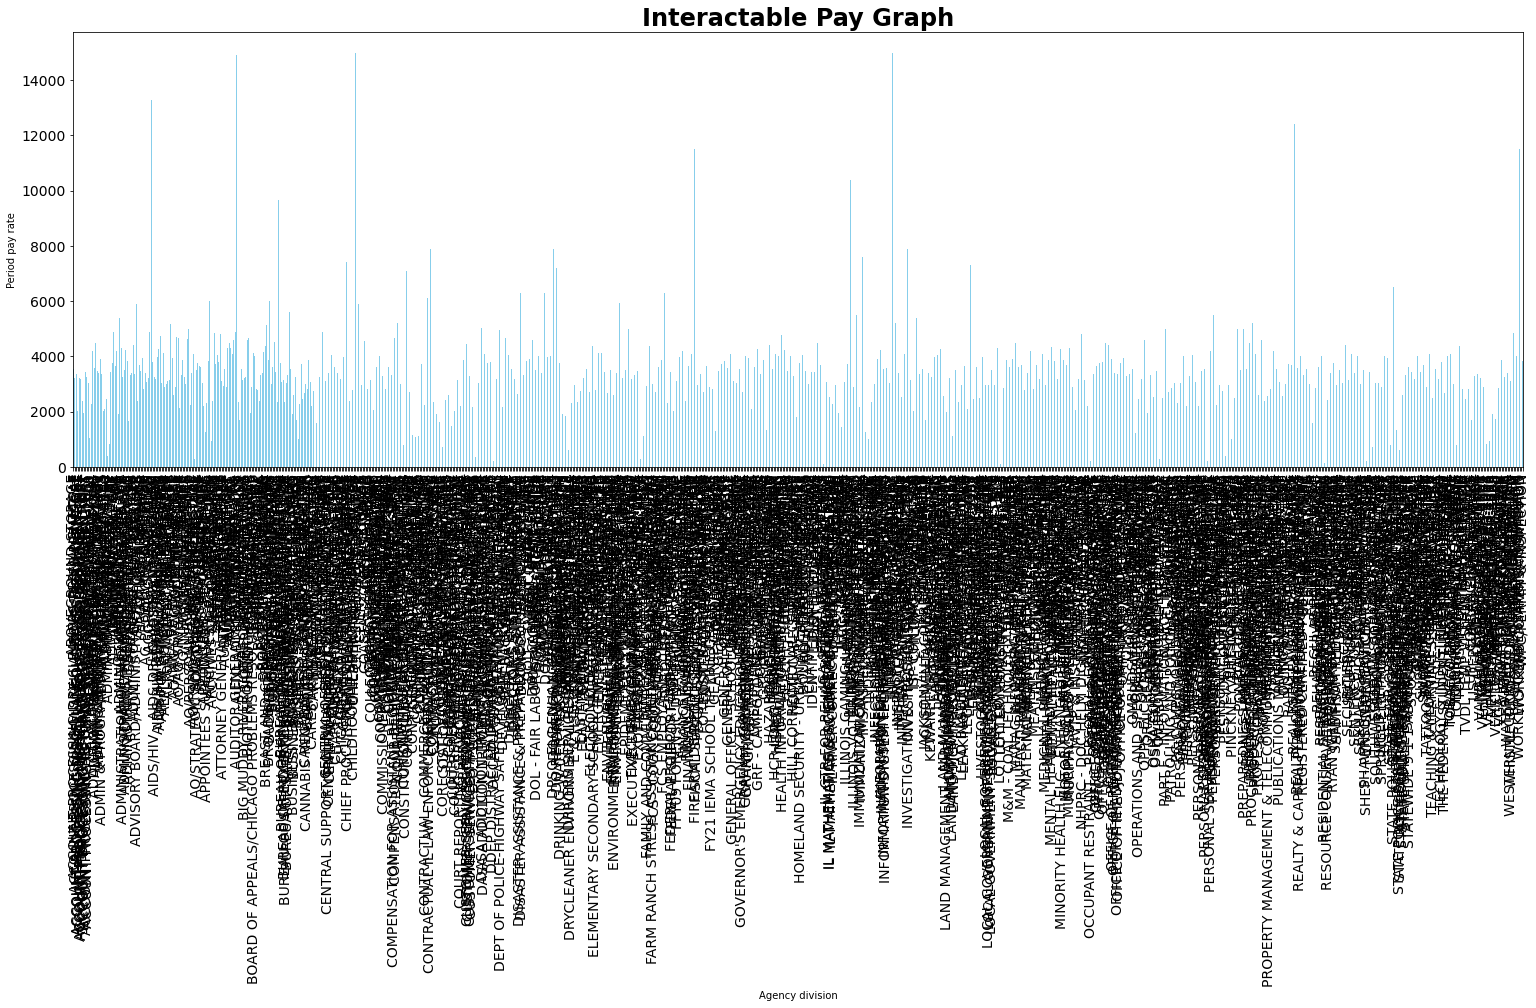

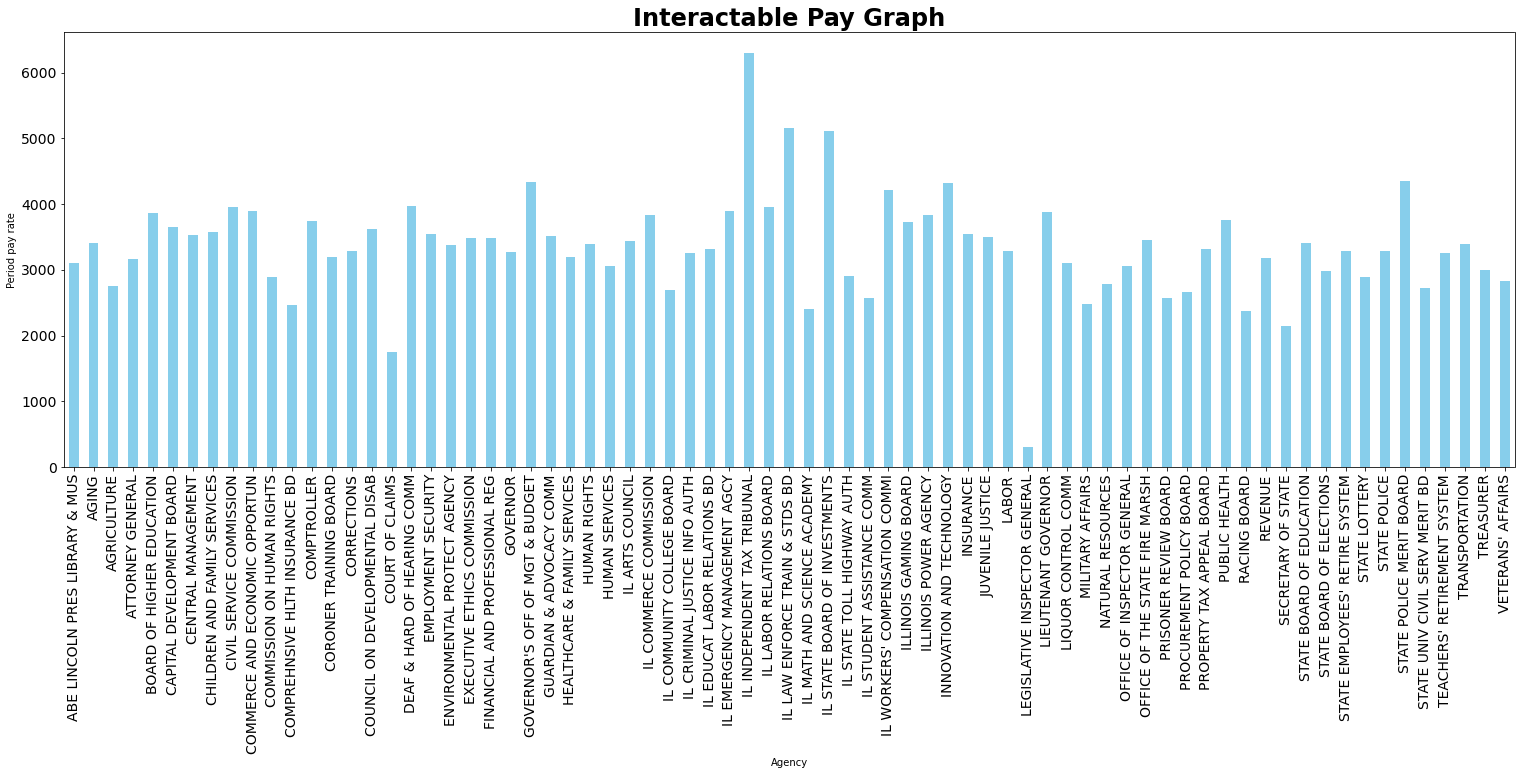

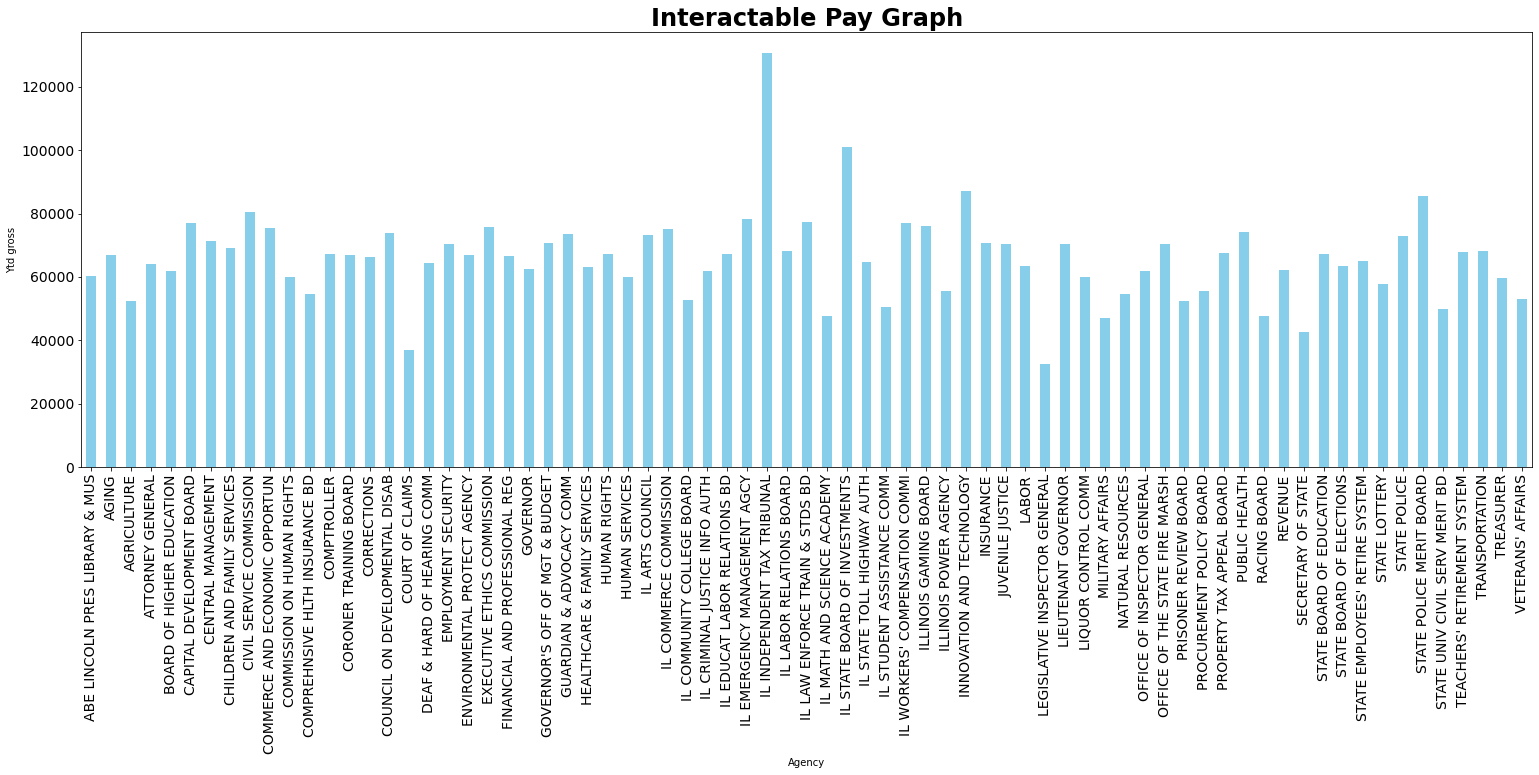

In [17]:
column_types = ['Agency', 'Agency Division', 'Employee Name']
column_pay = ['Period Pay Rate', 'YTD Gross']
@ipywidgets.interact(xaxis=column_types, 
                     yaxis=column_pay)

def create_scatter(xaxis, yaxis):
    pay.groupby(xaxis)[yaxis].mean().plot(x = xaxis, y=yaxis, figsize = (26,8), rot = 90, kind = 'bar', color = 'skyblue', fontsize = 14)

    plt.xlabel(xaxis.capitalize())
    plt.ylabel(yaxis.capitalize())
    plt.title("Interactable Pay Graph", fontsize = 24, weight = "bold")

Text(0.5, 1.0, 'Agency Average Pay YTD')

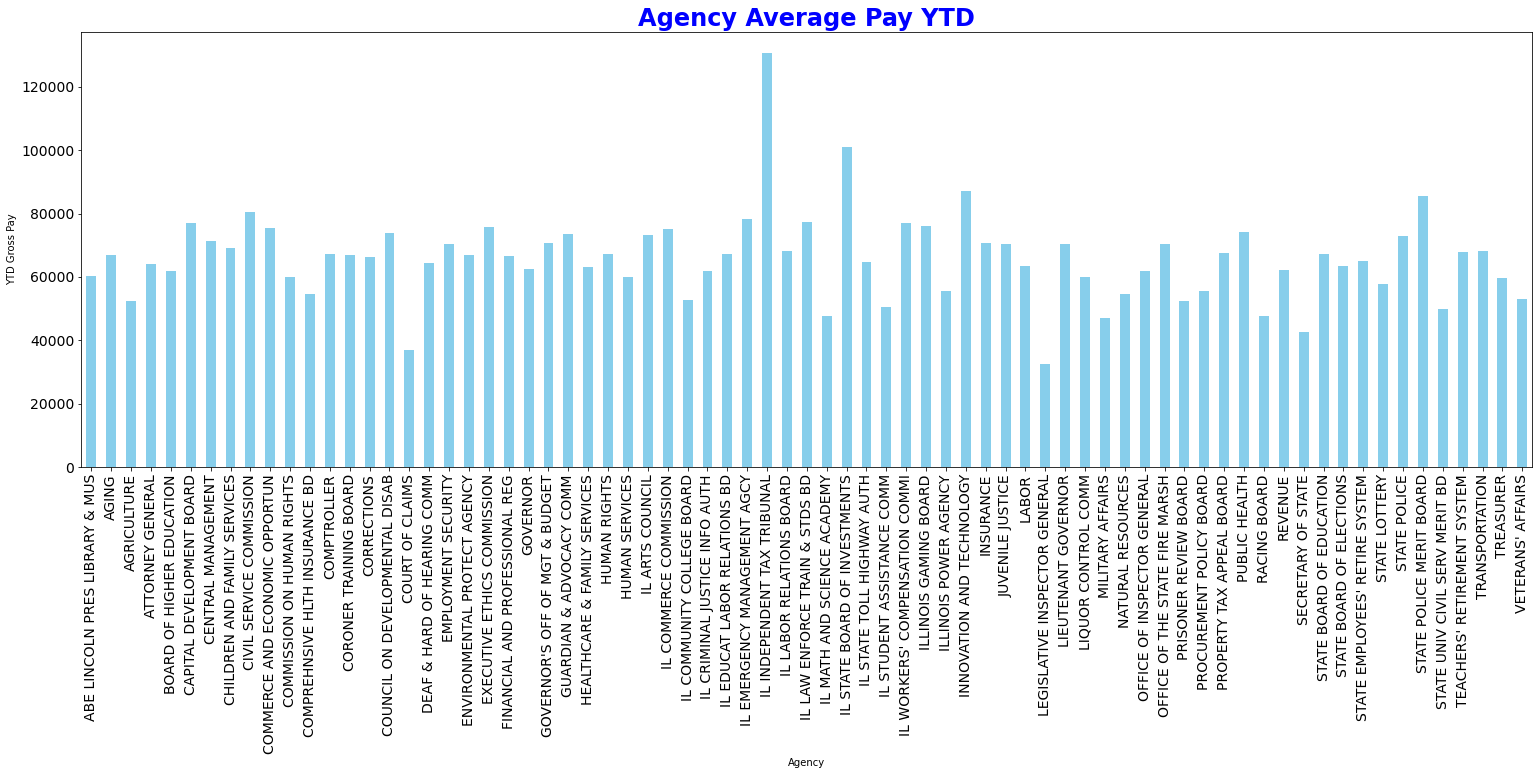

In [8]:
#To compary to what I did above, and seeing the differentiation. This is also to show the difference between hard coding and the result is the same if you select the same parameters in our interactive code above. This is a graph gathering the mean for YTD Gross per Agency
pay.groupby("Agency")["YTD Gross"].mean().plot(x = "Agency", y="YTD Gross", figsize = (26,8), rot = 90, kind = 'bar', color = 'skyblue', fontsize = 14)
plt.ylabel("YTD Gross Pay")
plt.title("Agency Average Pay YTD", fontsize = 24, weight = "bold", color = "Blue")

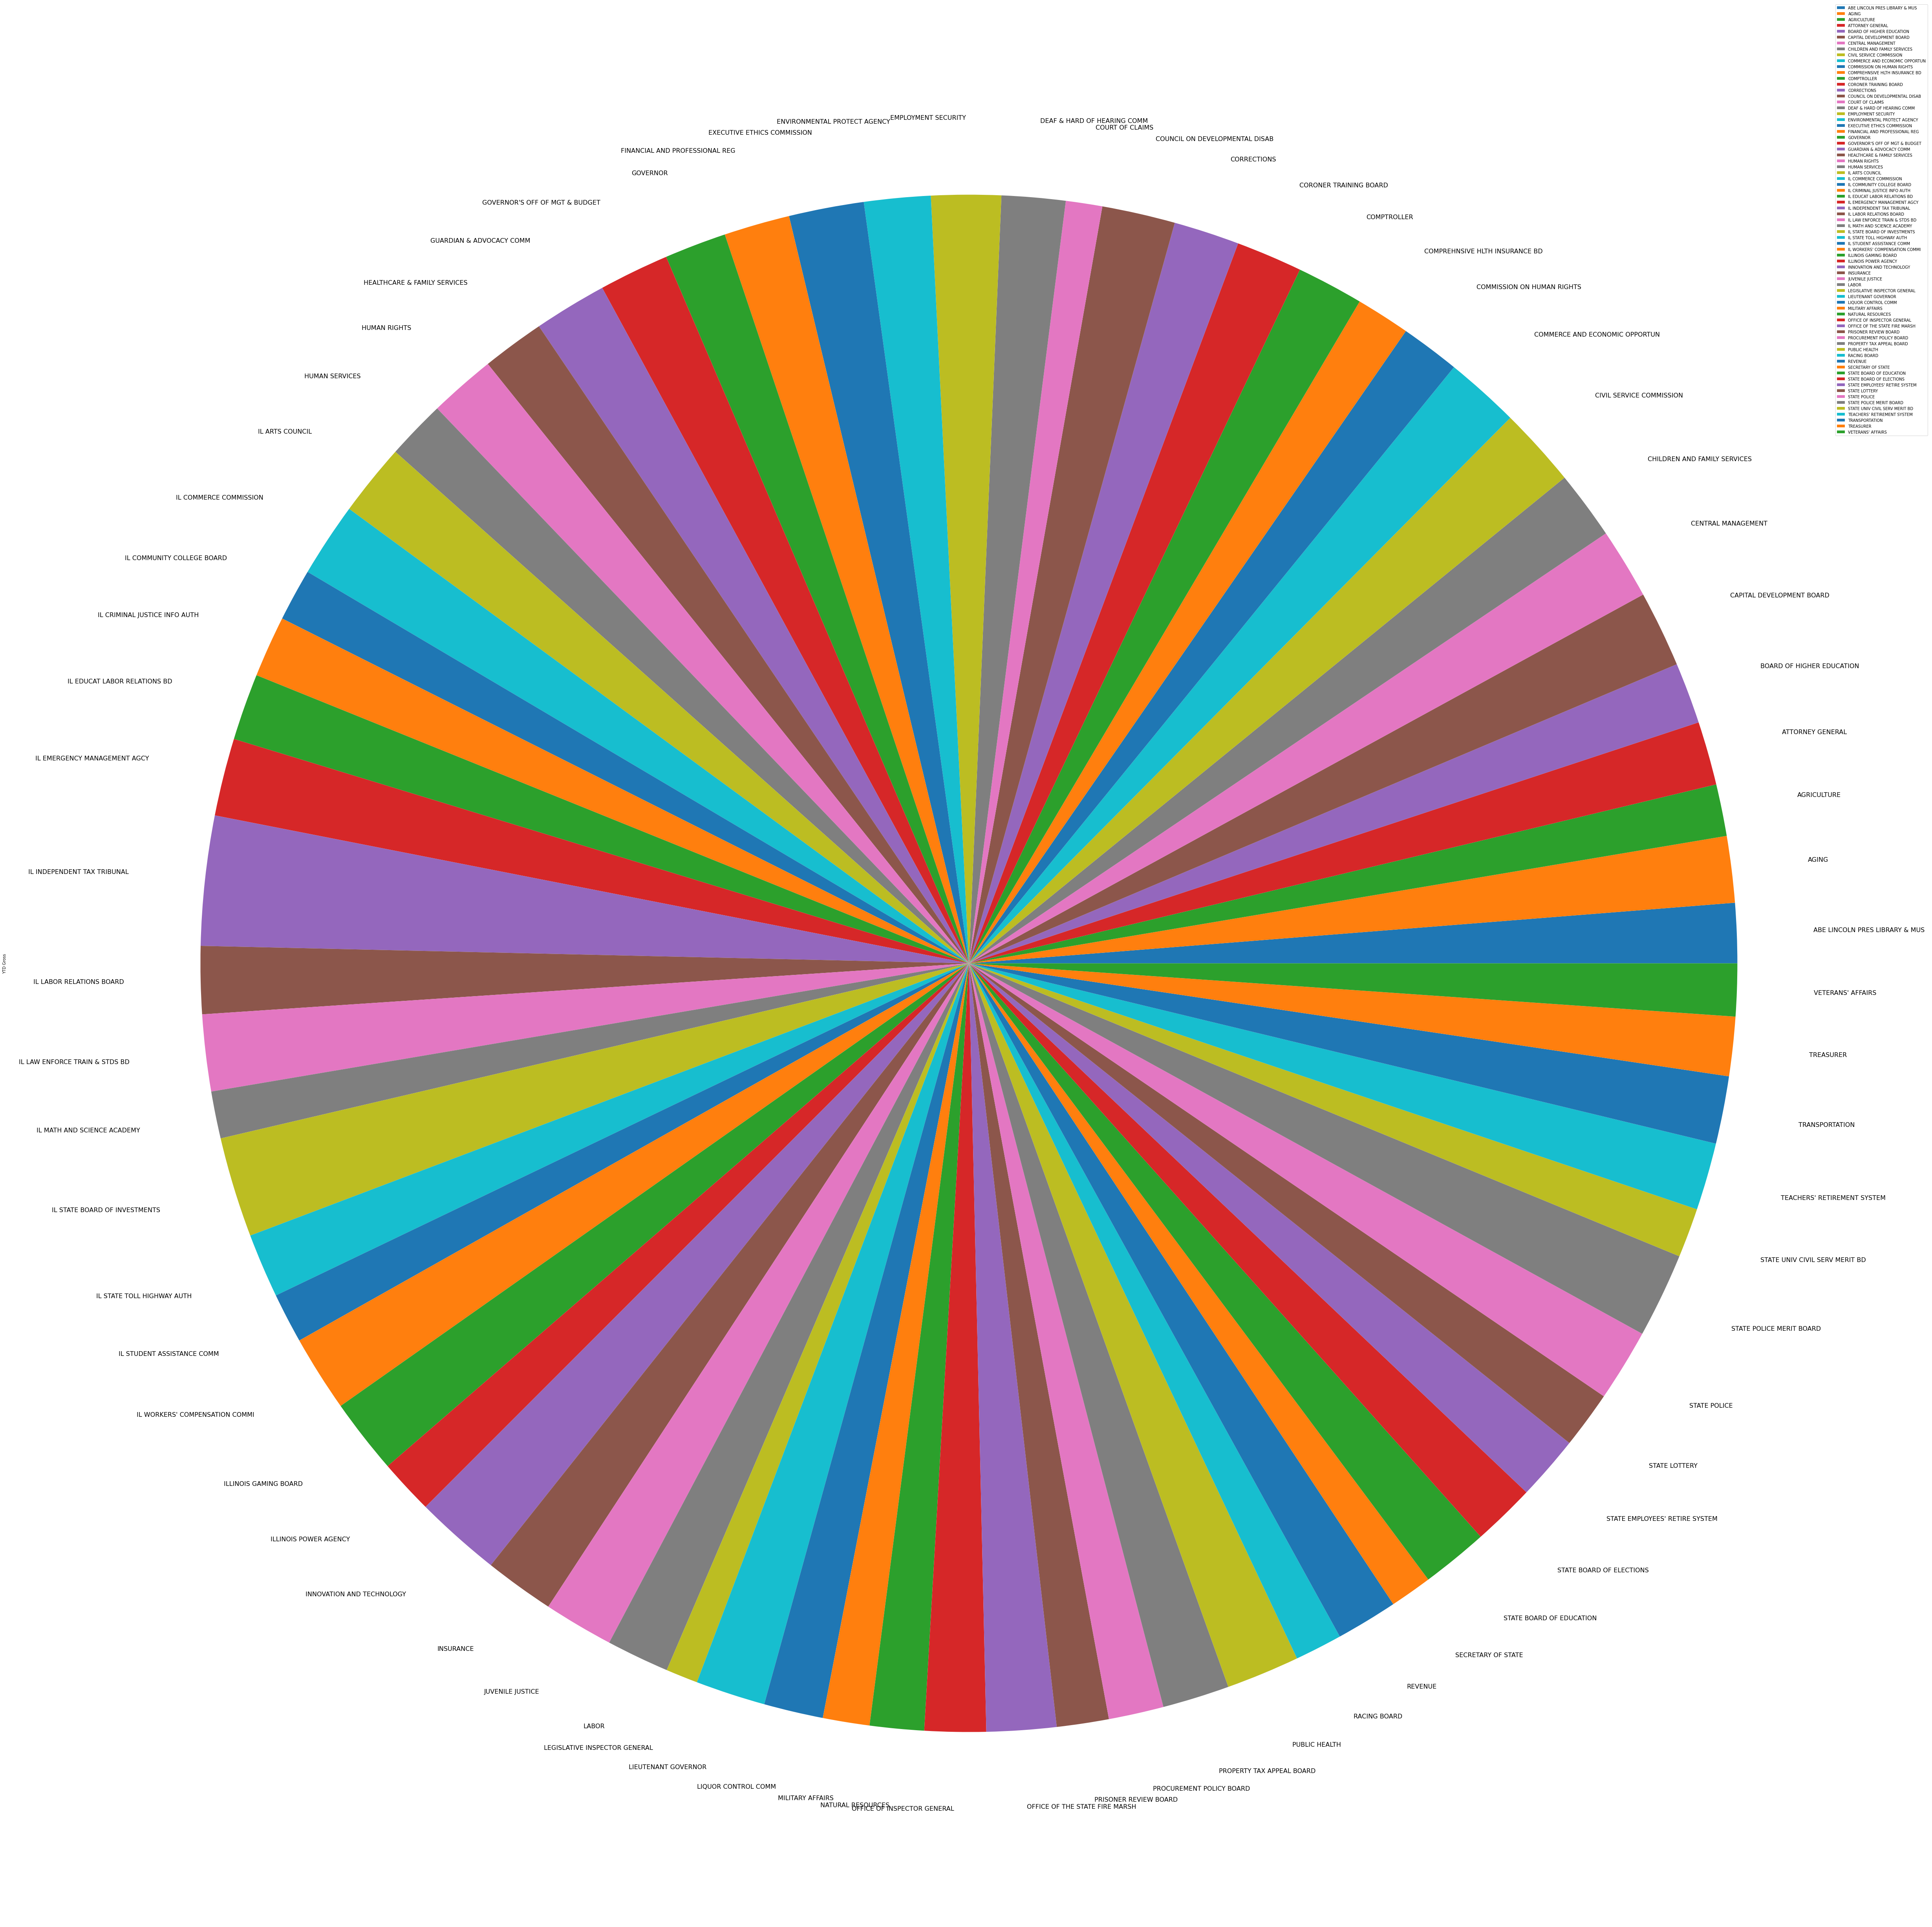

In [42]:
pay.groupby(['Agency']).mean().plot(kind='pie', y='YTD Gross', figsize = (120,90), fontsize = 16)

Here we will be exploring the following dataset: https://data.illinois.gov/dataset/724state_employee_pay

When looking at the following visualizations, our first one here is an interactive graph that allows us to look at the mean pays of state employees. You can choose whether you want to look at Agency, Agency Division, or Employee (Employee is a rather large and rough visualization, but it can be produced!). You can also look at the 2 different types of pay, YTD Gross or Period Pay Rate, YTD would be yearly pay whereas Period is just the pay they get per pay period (so YTD is the total in a year). It's a rather simple interactive graph as the dataset only has a few columns to work with, so we look at the most relevant relations.

Following that visualization is our 2nd one that looks specifically at the average YTD Gross per Agency. The reason this one is supplied and is technically a duplicate of information is to prove that the interactive graph is working properly as while both are similarly coded, we get to see that the graph here is hard coded with the information where as the interactive one needs you to select it. They both have the same outcome which was a pleasant end result for me to see the interactivity working here.

Our final visual is a pie chart showing each average YTD gross per Agency. The reason this was one I wanted to include is because I felt it a more intriguing visual to see how they directly compare to each other, though I will admit the text differentiating each spot is a little bit awkward. There are repeating colors due to the sheer amount of Agencies, but it was nice to see the size comparison and it feels like to me it is much easier to pick out what Agencies get paid more on average. The main reason we looked at this average YTD gross per agency was to see that difference in pay between agencies and to see who gets paid the most, least, same, or different in general.

All data and visualizations are generated from that dataset I have supplied. I'd love to hear some feedback on how to improve these visualizations, so any feedback is much appreciated. I definitely want to improve them!